##   Pandas Usecase in R
  We have to use dplyr library to solve pandas usecase in R. We will start importing typical data  science library

In [28]:
options(warn=-1)
library(dplyr)
library(tidyverse)
library(lubridate)
library(zoo)
library(xts)
library('ggplot2')

## Series

 Series is like a list or 1D-array, but with index. All operations are index-aligned. Indexing of row in R we have to use row.names.


In [29]:
a<- 1:9

In [30]:
b = c("I","like","to","use","Python","and","Pandas","very","much")

In [31]:
a1 = length(a)
b1 = length(b)

In [32]:
a = data.frame(a,row.names = c(1:a1))
print(a)

  a
1 1
2 2
3 3
4 4
5 5
6 6
7 7
8 8
9 9


In [33]:
b = data.frame(b,row.names = c(1:b1))
print(b)

       b
1      I
2   like
3     to
4    use
5 Python
6    and
7 Pandas
8   very
9   much


 One of the frequent usages of series is time series. In time series, the index has a special structure - typically a range of dates or datetimes. The easiest way to create time series using the ts function. But we will try another way to implement time series.  We have to use the lubridate library to create an index of dates using the seq function.
 
 Suppose we have a series that shows the amount of product bought every day, and we know that every Sunday we also need to take one additional item for ourselves. Here is how to model  using series:

In [34]:
# We will use ggplot2 for visualizing the data
# If you want to change the plot size repr library will be used
library(repr)
options(repr.plot.width = 12,repr.plot.height=6)

[1] "length of index is  366"


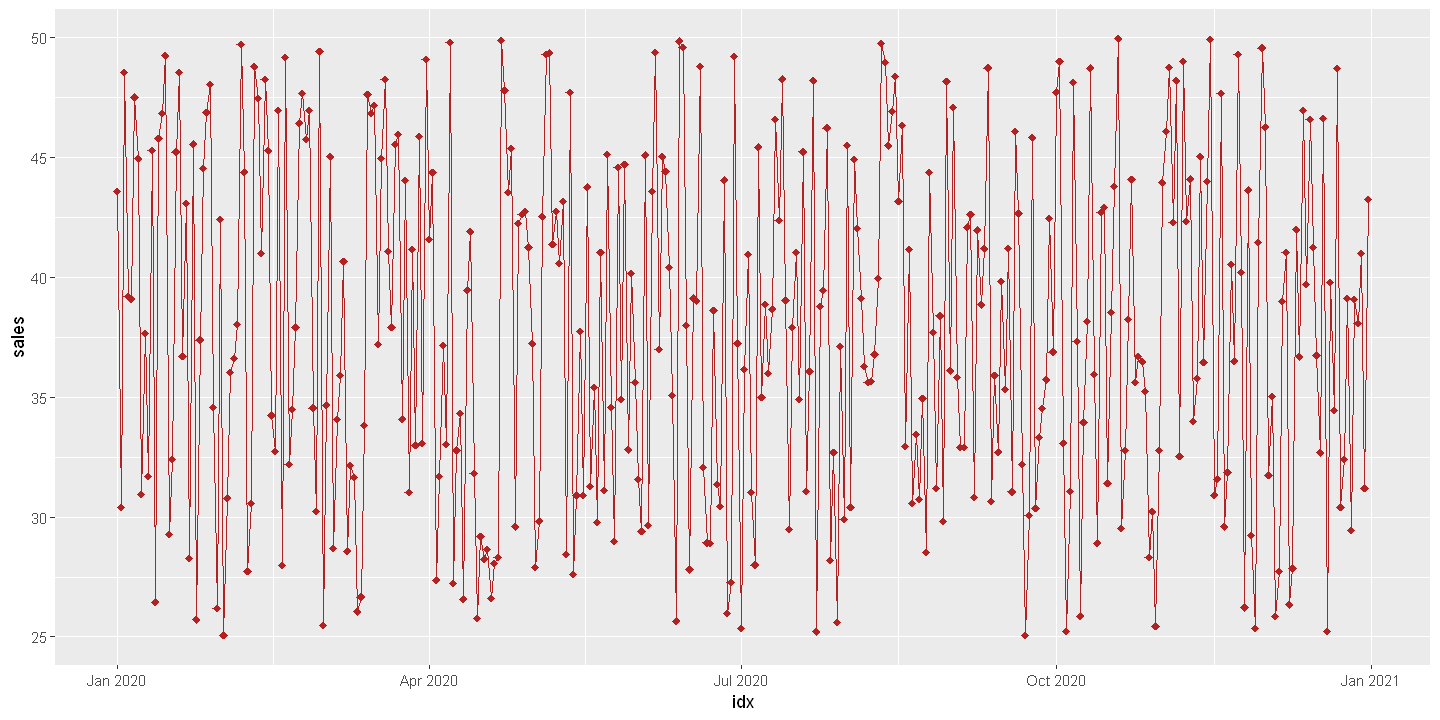

In [35]:
start_date <- mdy("Jan 1, 2020")
end_date <- mdy("Dec 31, 2020")
idx = seq(start_date,end_date,by ='day')
print(paste("length of index is ",length(idx)))
size = length(idx)
sales = runif(366,min=25,max=50)
sold_items <- data.frame(row.names=idx[0:size],sales)
ggplot(sold_items,aes(x=idx,y=sales)) + geom_point(color = "firebrick", shape = "diamond", size = 2) +
    geom_line(color = "firebrick", size = .3)

We are merging additional_items and sold_items so that we can find the total no of products.
As you can see, we are having problems here to find the total, we are getting NaN value as in the weekly series non-mentioned days are considered to be missing (NaN) if we add NaN to a number that gives us NaN.
In order to do addition, we need to replace NAN with 0.

In [36]:
index = seq(start_date,end_date,by = 'week')
sz = length(index)
additional_product <- rep(10,53)
additional_items  <- data.frame(row.names = index[0:sz],additional_product)
additional_items
# we are merging two dataframe so that we can add
additional_item = merge(additional_items,sold_items, by = 0, all = TRUE)[-1] 
total  = data.frame(row.names=idx[0:size],additional_item$additional_product + additional_item$sales)
colnames(total) =  c('total')
total

,additional_product
,<dbl>
2020-01-01,10
2020-01-08,10
2020-01-15,10
2020-01-22,10
2020-01-29,10
2020-02-05,10
2020-02-12,10
2020-02-19,10
2020-02-26,10


,total
,<dbl>
2020-01-01,53.59979
2020-01-02,NA
2020-01-03,NA
2020-01-04,NA
2020-01-05,NA
2020-01-06,NA
2020-01-07,NA
2020-01-08,40.93455
2020-01-09,NA


In [37]:
additional_item[is.na(additional_item)] = 0
total  = data.frame(row.names=idx[0:size],additional_item$additional_product + additional_item$sales)
colnames(total) =  c('total')
total

,total
,<dbl>
2020-01-01,53.59979
2020-01-02,30.41127
2020-01-03,48.54839
2020-01-04,39.20897
2020-01-05,39.09894
2020-01-06,47.53019
2020-01-07,44.94766
2020-01-08,40.93455
2020-01-09,37.66561


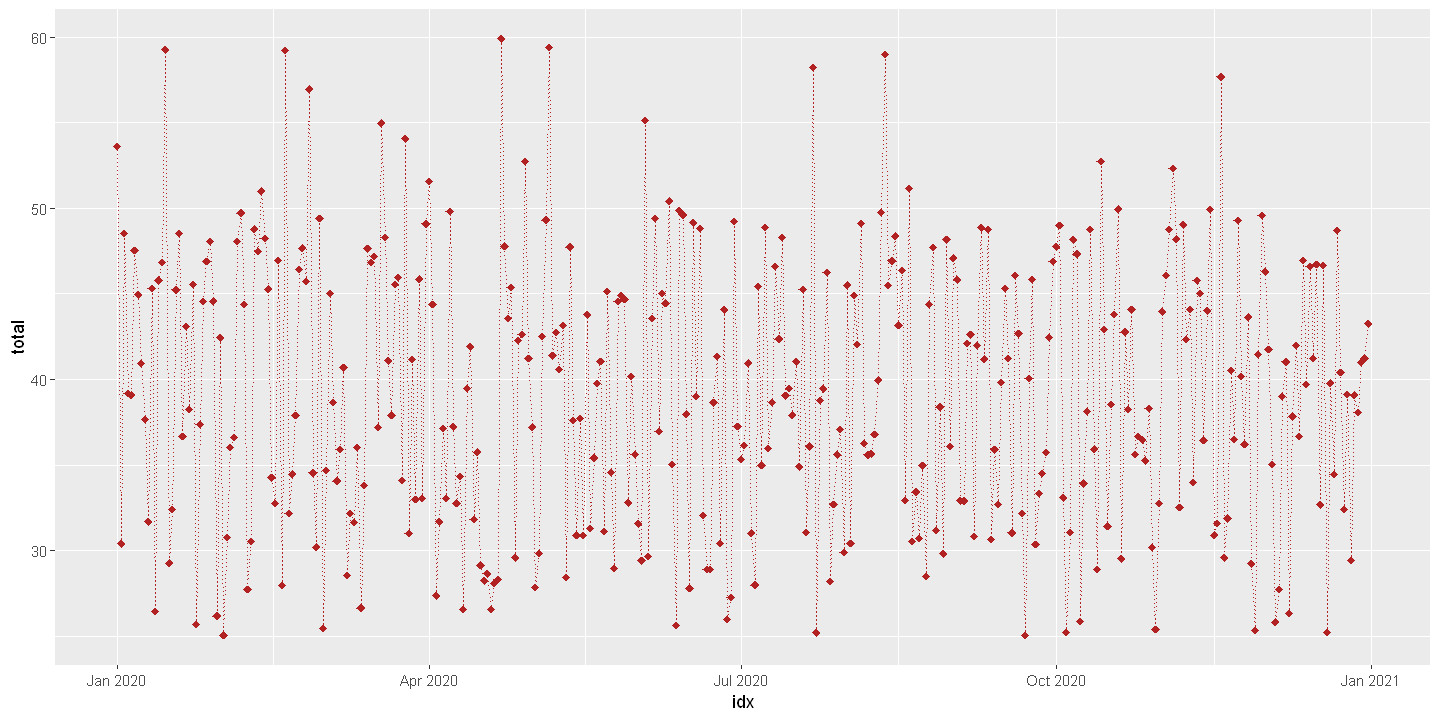

In [38]:
ggplot(total,aes(x=idx,y=total)) + geom_point(color = "firebrick", shape = "diamond", size = 2) +
    geom_line(color = "firebrick", linetype = "dotted", size = .3)

We want to analyse total no of product in monthly basis.Thus, we find the mean of total no of product in a month and  draw a bargraph

In [39]:
index = seq(start_date,end_date,by ='month')


              total
2020-01-31 41.03847
2020-02-29 40.91568
2020-03-31 39.27424
2020-04-30 37.63589
2020-05-31 38.75129
2020-06-30 38.75744
2020-07-31 38.35212
2020-08-31 40.43712
2020-09-30 38.90043
2020-10-31 37.99855
2020-11-30 41.20759
2020-12-31 38.46355

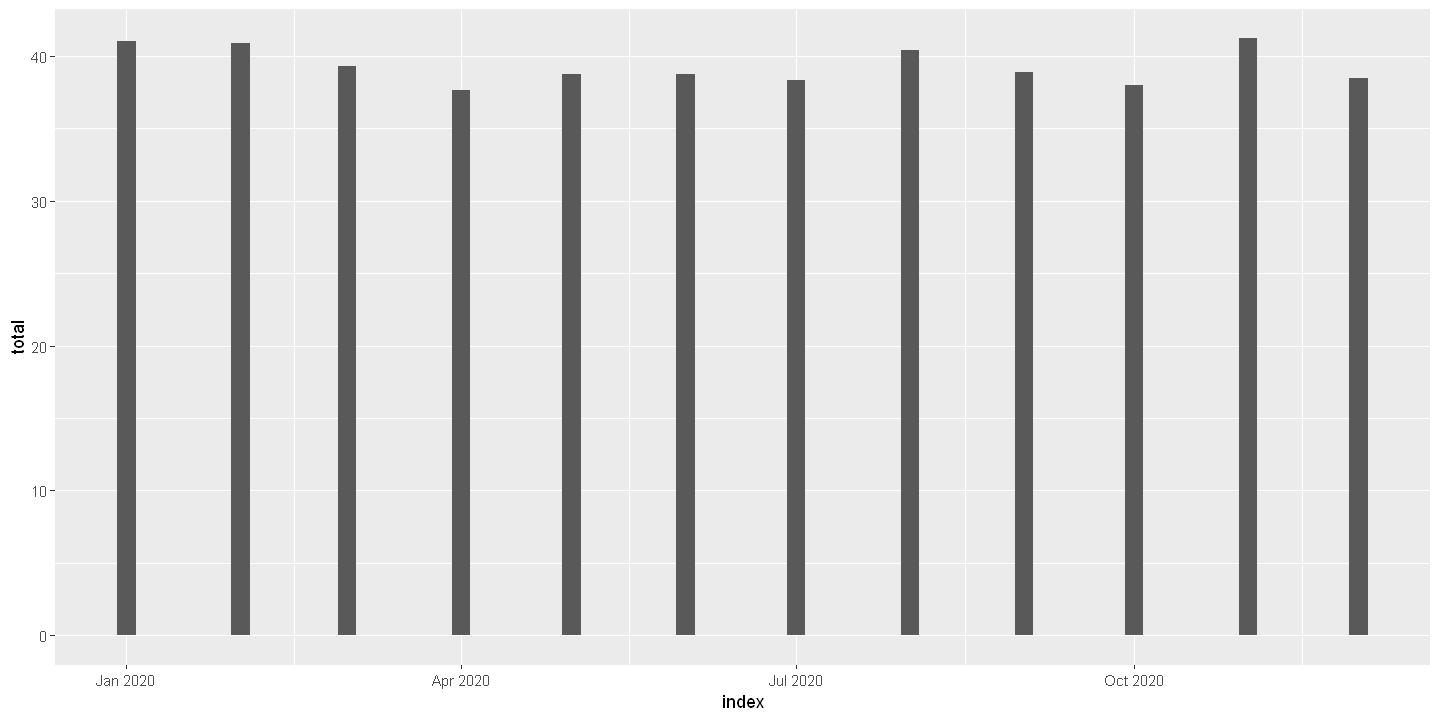

In [40]:
x<- as.xts(total, dateFormat ="Date")
(monthly<-apply.monthly(x,mean))
ggplot(monthly, aes(x=index, y=total)) + 
  geom_bar(stat = "identity", width=5) 

## DataFrame
Dataframe is essentially a collection of series with the same index. We can combine several series together into a dataframe. 
For example we are making dataframe of a  and b series

In [41]:
a = data.frame(a,row.names = c(1:a1))

In [42]:
b = data.frame(b,row.names = c(1:b1))

In [43]:
df<- data.frame(a,b)
df

,a,b
,<int>,<chr>
1,1,I
2,2,like
3,3,to
4,4,use
5,5,Python
6,6,and
7,7,Pandas
8,8,very
9,9,much


We can also rename the column name by using rename function

In [44]:
df = 
  rename(df,
    A = a,
    B = b,
  )

In [45]:
df

,A,B
,<int>,<chr>
1,1,I
2,2,like
3,3,to
4,4,use
5,5,Python
6,6,and
7,7,Pandas
8,8,very
9,9,much


We can also select a column in a dataframe  using select function

In [46]:
cat("Column A (series):\n")
select(df,'A')

Column A (series):


,A
,<int>
1,1
2,2
3,3
4,4
5,5
6,6
7,7
8,8
9,9


We will extract rows that meet a certain logical criteria on series

In [47]:
df[df$A<5,]

,A,B
,<int>,<chr>
1,1,I
2,2,like
3,3,to
4,4,use


In [48]:
df[df$A>5 & df$A<7,]

,A,B
,<int>,<chr>
6,6,and


Creating  a new  columns. 

Code below creates a series which calculates the divergence of a from its mean value then merging into a existing dataframe.

In [49]:
df$DivA <- df$A - mean(df$A)

In [50]:
df

,A,B,DivA
,<int>,<chr>,<dbl>
1,1,I,-4
2,2,like,-3
3,3,to,-2
4,4,use,-1
5,5,Python,0
6,6,and,1
7,7,Pandas,2
8,8,very,3
9,9,much,4


We are creating a series which  calculates the length of string of A column then merge into existing dataframe

In [51]:
df$LenB <- str_length(df$B)

In [52]:
df

,A,B,DivA,LenB
,<int>,<chr>,<dbl>,<int>
1,1,I,-4,1
2,2,like,-3,4
3,3,to,-2,2
4,4,use,-1,3
5,5,Python,0,6
6,6,and,1,3
7,7,Pandas,2,6
8,8,very,3,4
9,9,much,4,4


Selecting rows based on numbers 

In [53]:
df[0:5,]

,A,B,DivA,LenB
,<int>,<chr>,<dbl>,<int>
1,1,I,-4,1
2,2,like,-3,4
3,3,to,-2,2
4,4,use,-1,3
5,5,Python,0,6


***Grouping means which groups the multiple columns based on certain conditions and we will use summarise function to see the difference***

Suppose that we want to compute the mean value of column A for each given number of LenB. Then we can group our DataFrame by LenB, and find mean name them as a

In [54]:
df1 = df %>% group_by(LenB) %>% summarise(a = mean(A))

In [55]:
df1

LenB,a
<int>,<dbl>
1,1.000000
2,3.000000
3,5.000000
4,6.333333
6,6.000000


In [56]:
df2 = df %>% group_by(LenB) %>%
summarise(MEAN = mean(A),count =length(DivA))

## Printing and Plotting
 When We call head(df)  it will print out dataframe in a tabular form.

The first step of any data science project is data cleaning and visualization, thus it is important to visualize the dataset and extract some useful imformation.

In [57]:
#dataset = read.csv("file name")

In [58]:
head(df)

,A,B,DivA,LenB
,<int>,<chr>,<dbl>,<int>
1,1,I,-4,1
2,2,like,-3,4
3,3,to,-2,2
4,4,use,-1,3
5,5,Python,0,6
6,6,and,1,3


ggplot2 is a very good library as it simple to create complex plots from data in a data frame.

It provides a more programmatic interface for specifying what variables to plot, how they are displayed, and general visual properties.

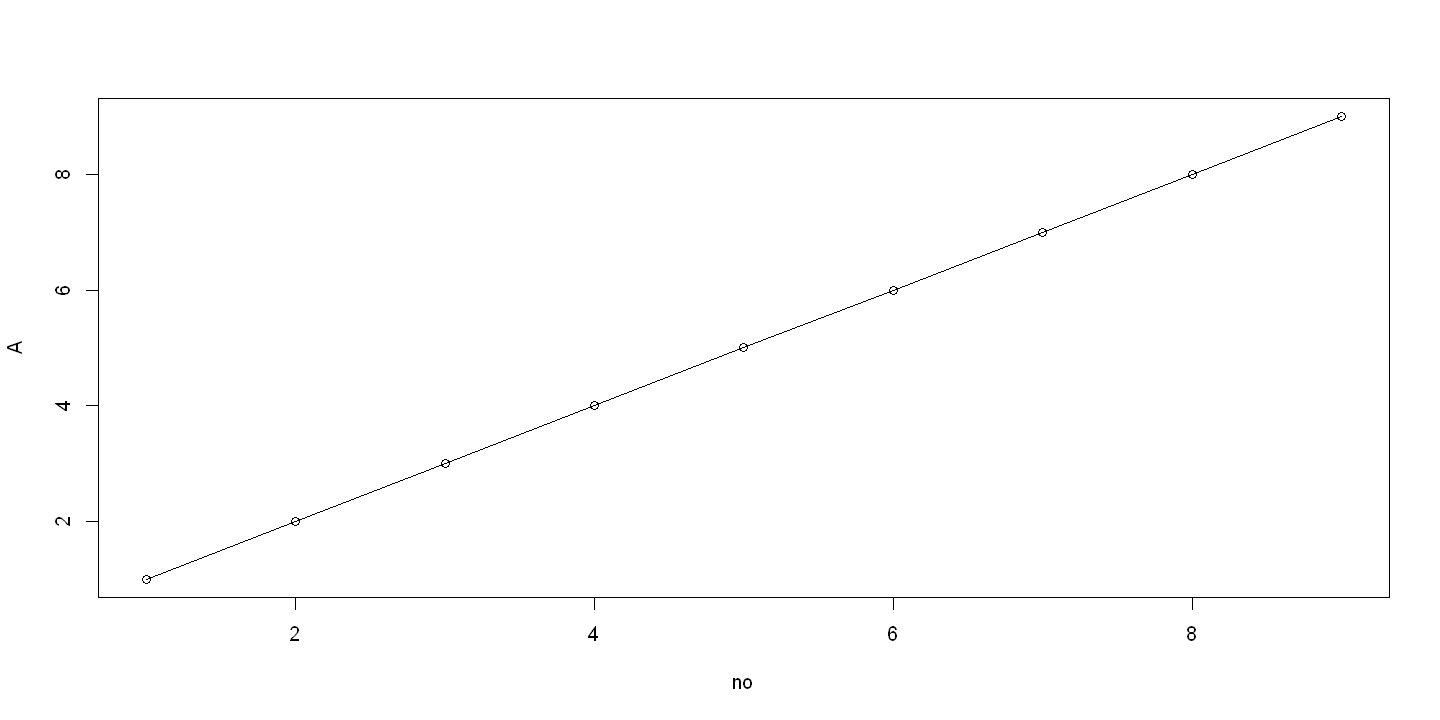

In [59]:
plot(df$A,type = 'o',xlab = "no",ylab = "A")

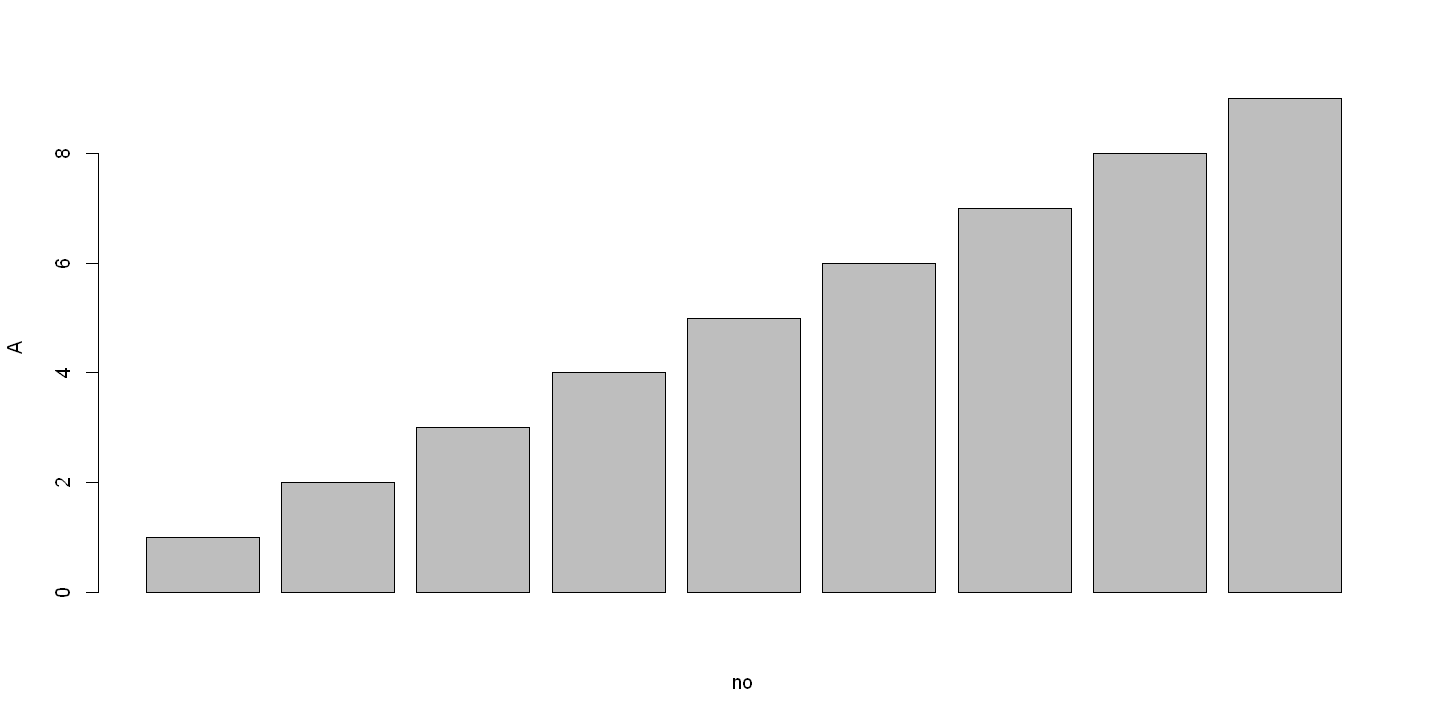

In [60]:
barplot(df$A, ylab = 'A',xlab = 'no')